Objective : To predict fashion classes such as pants,shirts and shoes from grayscale images.

1. Performing data cleaning,feature enginerring and visualization.
2. Artifical neural network.
3.Building ,train and test an artifical neural network model in Keras and tensorflow.

1. Fashion training set consists of 70000 
images divided into 60000 training and 10000 testing saples.dataset samples consits of 28*28 grayscale images, associated with a label from 10 classes.


2. The 10 classes are as follows

*   0 => T-shirt/top
*   1 => Trouser
*   2 => Pullover
*   3 => Dress
*   4 => Coat
*   5 => Sandal
*   6 => Shirt
*   7 => Sneaker
*   8 => Bag
*   9 => Ankle boot

3. Each image is 28 pixels in height and 28 pixels in width,784 pixels in total.

4. Each pixel has single pixel value associated with it,indicating the lightness or darkness of that pixel,with highter numbers meaning darker.
The pixel- value is an integer between 0 and 255.








In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import datasets

In [ ]:
import tensorflow as tf
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Data visualization

5


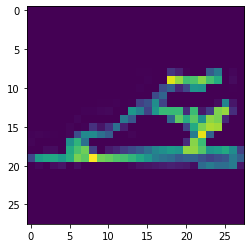

In [ ]:

i = 300
plt.imshow(X_train[i])
print(y_train[i])

2


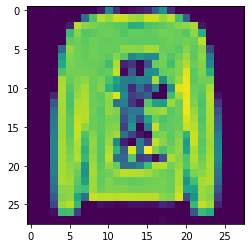

In [ ]:
i = 900
plt.imshow(X_train[i])
print(y_train[i])

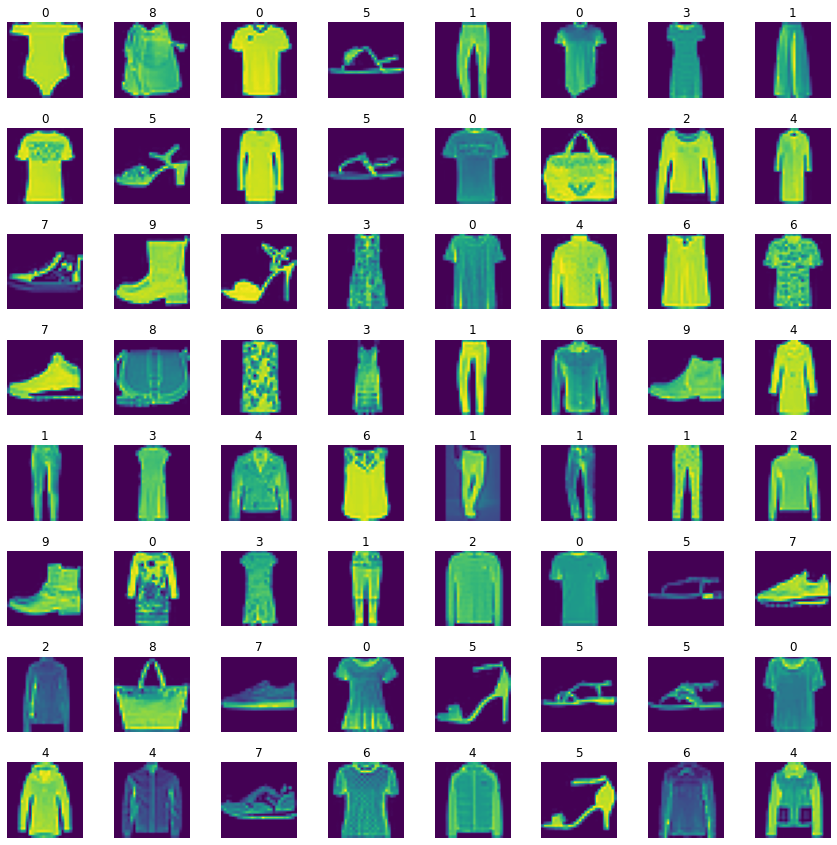

In [ ]:
W_grid = 8
L_grid = 8

fig,axes = plt.subplots(L_grid, W_grid, figsize=(15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid* W_grid):
  index = np.random.randint(0,n_training)   #pick a random number
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

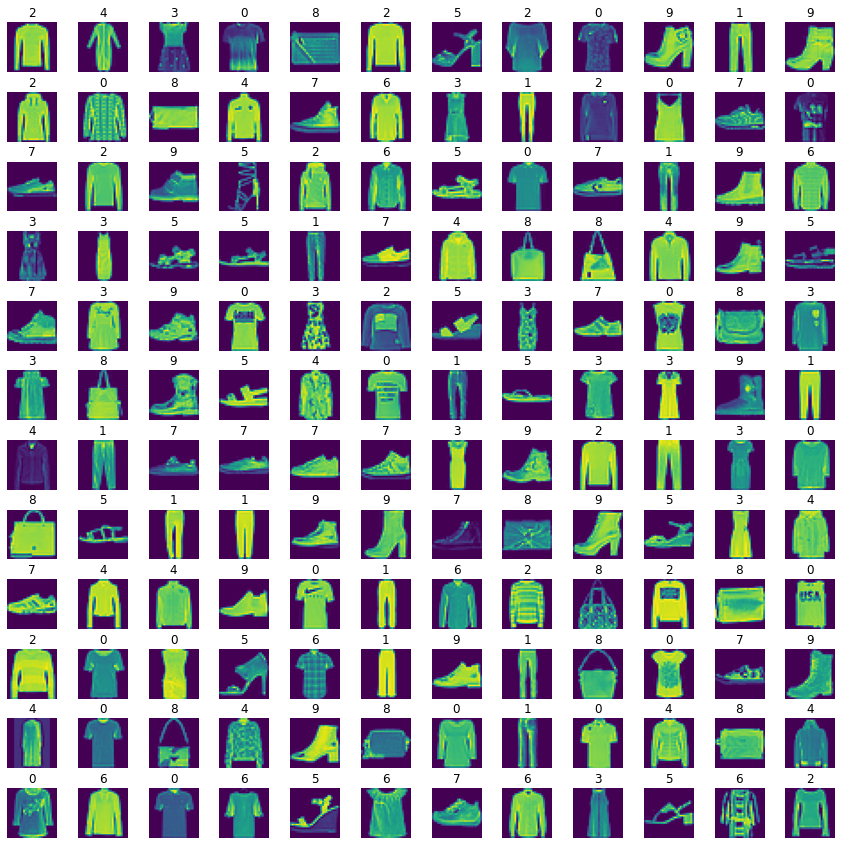

In [ ]:
W_grid = 12
L_grid = 12

fig,axes = plt.subplots(L_grid, W_grid, figsize=(15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid* W_grid):
  index = np.random.randint(0,n_training)   #pick a random number
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Prepare data for training

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
number_cat = 10
y_train = tf.keras.utils.to_categorical(y_train,number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test,number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train = np.expand_dims(X_train,axis=-1)


In [ ]:
X_train.shape

(60000, 28, 28, 1)

Build a Deep learning network

In [ ]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()
cnn.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64,(3,3),activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64,(3,3),activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation= 'relu'))
#cnn.add(layers.Dense(1024, activation= 'relu'))

cnn.add(layers.Dense(10, activation= 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

320,18496,36928,36928 and 625 trainable parameters.
if sum all this we get 93322 trainable parameters.

In [ ]:
X_train.shape

(60000, 28, 28, 1)

 **Compile and train a deep learning model**

RMSprop used to : 
1. Maintain a moving(discounted) average of the square of gradients.

2. Divide the gradient by root of this average.



*   RMSProp is neural network training algorithm that work in adaptiva fashion,It adapt learning rate to adapt optimal performance.
*   As i have multiple classes I will use 'categorial_crossentropy' as loss,if I have only two class,can use 'binary_crossentropy'.



In [ ]:
cnn.compile(optimizer= tf.keras.optimizers.RMSprop(0.0001,decay= 1e-6),loss = 'categorical_crossentropy',metrics = ['accuracy'])



*   Epochs : Every time I feed in all the images to my deep neural network model and update the weight once this is called epoch.
*   Epoch simply is one iteration on one run of training data.



In [ ]:
epochs = 50

history = cnn.fit(X_train,y_train,batch_size=512, epochs= epochs)

Epoch 1/50
118/118 [==============================] - 45s 374ms/step - loss: 1.3721 - accuracy: 0.6295
Epoch 2/50
118/118 [==============================] - 46s 388ms/step - loss: 0.5985 - accuracy: 0.7938
Epoch 3/50
118/118 [==============================] - 44s 374ms/step - loss: 0.4958 - accuracy: 0.8271
Epoch 4/50
118/118 [==============================] - 44s 375ms/step - loss: 0.4422 - accuracy: 0.8456
Epoch 5/50
118/118 [==============================] - 44s 373ms/step - loss: 0.4049 - accuracy: 0.8565
Epoch 6/50
118/118 [==============================] - 44s 374ms/step - loss: 0.3792 - accuracy: 0.8651
Epoch 7/50
118/118 [==============================] - 45s 383ms/step - loss: 0.3560 - accuracy: 0.8737
Epoch 8/50
118/118 [==============================] - 44s 374ms/step - loss: 0.3377 - accuracy: 0.8802
Epoch 9/50
118/118 [==============================] - 44s 374ms/step - loss: 0.3201 - accuracy: 0.8856
Epoch 10/50
118/118 [==============================] - 44s 375ms/step - l


1.  We are using loss function to compute the distance between current output of function and expected output. 
2. Cross-Entropy is information therotic measure that calculate the difference between two averages of the number of bits of information.
3. During training,after 50 epochs we got accuracy of 96.54% and loss function value as 0.1039 < 0.2 (Great)



**Access Trained Model Performance**

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = np.expand_dims(X_test,axis=-1)
X_test.shape

(10000, 28, 28, 1)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.4310 - accuracy: 0.8842


[0.4310252368450165, 0.8841999769210815]



* While Evaluating we got accuracy of 88.42% and loss function is 0.431 > 0.3 (Not great)



In [ ]:
X_test = X_test.astype('float')

In [ ]:
predicted_classes = cnn.predict(X_test)
predicted_classes

array([[5.2990733e-11, 1.2486571e-15, 3.7560701e-12, ..., 1.2890646e-07,
        8.4314955e-13, 9.9999988e-01],
       [2.5884085e-04, 3.2563725e-09, 9.9973887e-01, ..., 4.5586618e-11,
        5.3973661e-08, 1.3305588e-11],
       [3.5583630e-11, 1.0000000e+00, 5.1532031e-14, ..., 3.9491438e-19,
        4.0240109e-14, 1.5531340e-12],
       ...,
       [7.4530784e-11, 3.5343196e-13, 2.5217092e-10, ..., 1.8037529e-17,
        1.0000000e+00, 4.9471830e-14],
       [6.5399086e-09, 1.0000000e+00, 1.2824371e-11, ..., 2.1052513e-14,
        2.4754026e-14, 3.0177378e-11],
       [2.1561118e-05, 2.7888228e-10, 2.8884629e-06, ..., 1.6528836e-02,
        5.8567151e-04, 3.7752045e-07]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predicted_classes,axis=1)
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5])

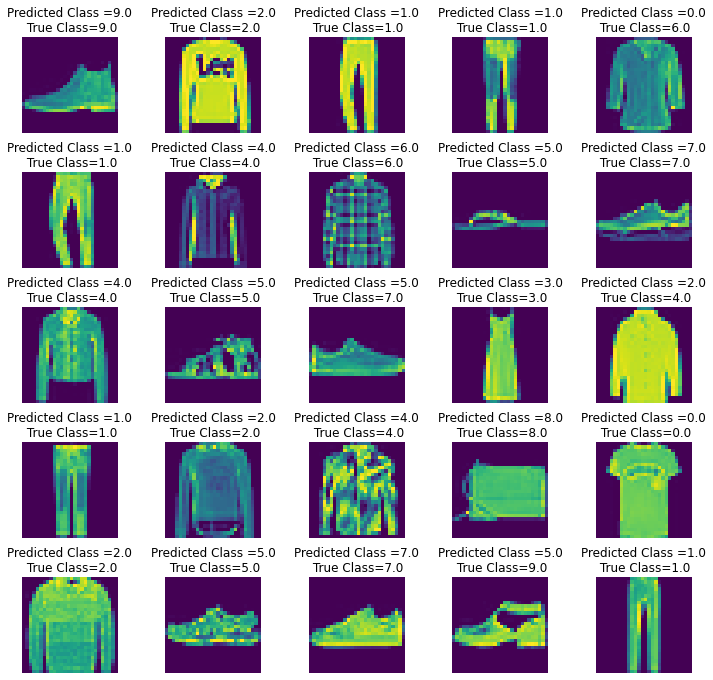

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title("Predicted Class ={:0.1f}\n True Class={:0.1f}".format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

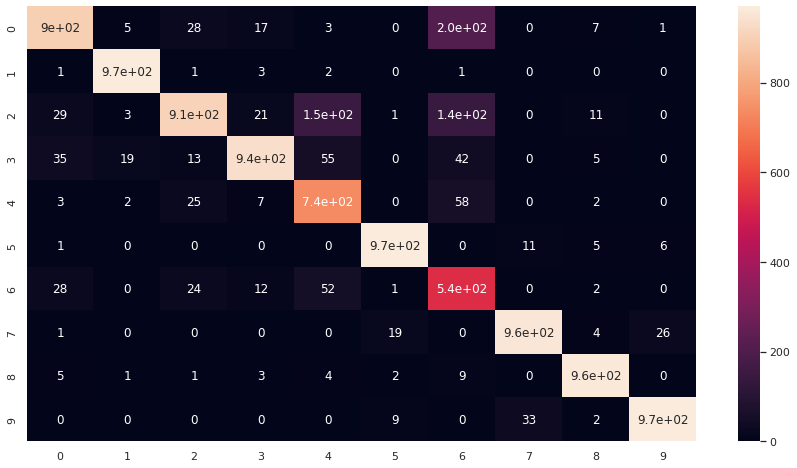

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_classes,y_test)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cm, annot= True)


In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class{}'.format(i) for i in range(num_classes)]

print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.72      0.91      0.80      1000
           3       0.85      0.94      0.89      1000
           4       0.88      0.74      0.80      1000
           5       0.98      0.97      0.97      1000
           6       0.82      0.54      0.65      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000





* We got the total accuracy of 88%.





* Add a new dense layer containing 1024 neurons
* Increase the number of epochs.
* Plot the model summary and determine the number of trainable parameters.
* Retain the model and evaluate its performance. 





